# Get Data

In [2]:
from azureml.core import Workspace, Dataset, Datastore
from azureml.core.authentication import ServicePrincipalAuthentication

# Service principal to authenticate with Azureml datastore
tenant_id = '305f1b09-dfce-4875-8ae1-287c94373798'
client_id = '7e35756d-5c6b-479e-8d7c-97b15c751b8c'
client_secret = ''
auth = ServicePrincipalAuthentication(tenant_id, client_id, client_secret)

# Workspace
subscription_id = '3ccb9182-11da-487f-9b4f-be7e2fcfd5d3'
resource_group = 'aml'
workspace_name = 'smws001'
workspace = Workspace(subscription_id, resource_group, workspace_name, auth)

# Load data into a pandas dataframe
datastore = Datastore.get(workspace, 'diabetes')
dataset = Dataset.Tabular.from_delimited_files(path=(datastore, 'dev_1_0_0'))
df = dataset.to_pandas_dataframe()

df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1142956,1,78,41,33,311,50.796392,0.420804,24,0
1,1823377,0,116,92,16,184,18.603630,0.131156,22,0
2,1916381,8,171,42,29,160,35.482247,0.082671,22,1
3,1247480,3,108,63,45,297,49.375169,0.100979,46,1
4,1516947,8,153,99,15,41,35.062139,0.116191,22,1


# Split data

In [3]:
from sklearn.model_selection import train_test_split

X, y = df[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI',
           'DiabetesPedigree', 'Age']].values, df['Diabetic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Train model

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1 / 0.1, solver="liblinear").fit(X_train, y_train)

# Evaluate model

In [5]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       988
           1       0.73      0.60      0.66       512

    accuracy                           0.79      1500
   macro avg       0.77      0.74      0.75      1500
weighted avg       0.78      0.79      0.78      1500



In [6]:
from sklearn.metrics import roc_auc_score

y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_scores[:, 1])
auc

0.8611680003795545

Text(0.5, 1.0, 'ROC Curve')

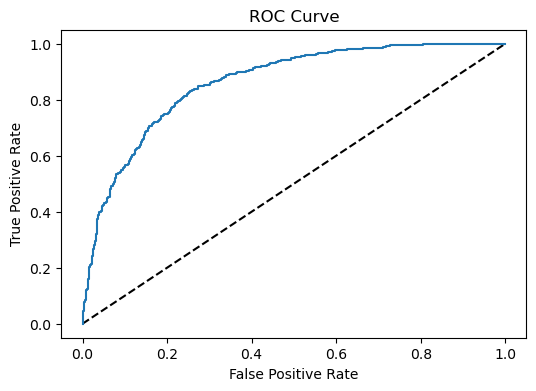

In [7]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')